Tên: Nguyễn Thọ Anh Khoa

Facebook: Khoa Nguyễn KT

Lớp: AI Insight 

# Tensorflow – Exercise 2

## 1) Đọc hiểu các về cách cài đặt bài linear, losgistic và softmax regression dùng Gradient tape trong tensorflow.

## a) Linear-Researcher.ipynb

## b) Logistic-Researcher.ipynb 

## c) Softmax-Researcher.ipynb

###  a) Linear-Researcher.ipynb

Thay vì khai báo các parmeter cần học và hàm thực thi predict riêng lẻ thì ở đây sử dung 1 calss model thuận tiện cho việc sử dụng. class này bao gồm method __init__ sẽ khởi tạo W and b, và method __call__ dùng như 1 function predict. Sau đó sẽ sử dụng gradient tape để backward và cập nhật parameter. 

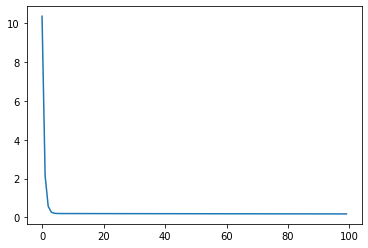

In [12]:
import tensorflow as tf 
import numpy as np

data = np.genfromtxt('data_lir.csv', delimiter=',')
X = data[:, 0:1]
y = data[:, 1:]

class Linear_Model(object):
    def __init__(self):
        self.W = tf.Variable(0.5)
        self.b = tf.Variable(1.0)
    def __call__(self, x):
        return self.W*x + self.b
    
lir_model = Linear_Model()
epochs = 100
lr = 0.01

losses = []
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        #predict
        output = lir_model(X)
        
        #loss
        loss = tf.reduce_mean(tf.square(output - y))
        losses.append(loss.numpy())
        
        #gradient
        dW, db = tape.gradient(loss, [lir_model.W, lir_model.b])
        
        #update
        lir_model.W.assign_sub(lr*dW)
        lir_model.b.assign_sub(lr*db)
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

### b) Logistic-Researcher.ipynb

1.0

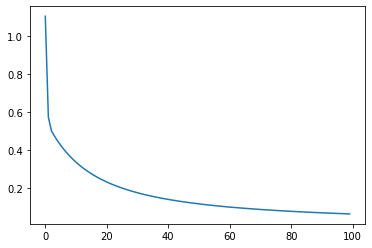

In [80]:
import tensorflow as tf
import numpy as np

data = np.genfromtxt('iris_full_lor.csv', delimiter=',', skip_header=1)
X = data[:, 0:4]
y = data[:, 4:]

#create model
class Lor_Model(object):
    def __init__(self, num_features):
        self.W = tf.Variable(tf.random.uniform((num_features,1), dtype=tf.float64), dtype=tf.float64)
        self.b = tf.Variable(0.01, dtype=tf.float64)
    def __call__(self, x):
        return tf.math.sigmoid(tf.matmul(x, self.W) + self.b)
    
lor_model = Lor_Model(X.shape[1])
lr = 0.1
epochs = 100
losses = []
loss = tf.keras.losses.BinaryCrossentropy()
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        #predict 
        output = lor_model(X)
        
        #loss
        loss_v = loss(y, output)
        losses.append(loss_v.numpy())
        
        #gradient
        dW, db = tape.gradient(loss_v, [lor_model.W, lor_model.b])
        
        #update
        lor_model.W.assign_sub(lr*dW)
        lor_model.b.assign_sub(lr*db)
        
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show

res = tf.round(lor_model(X)).numpy()
acc = (res == y)
acc.mean()

### c) Softmax-Researcher.ipynb

Các step của softmax tương tự như homework trước, chỉ khác về  cách thực hiện trên numpy còn phần này thực hiện trên tensorflow.

- Hàm predict dùng functon tf.math.softmax() của tensorflow để tìm softmax

- Ở phần weight, W, và b được khai báo đôc lập để thực hiện giống theo công thức và phù hợp với hàm predict ở trên, nhưng cũng có thể gộp W và b thành 1 variable 

- Loss ở đây được sử dụng là SparseCategoricalCrossentropy() Sparse sẽ có tính năng giống như convert label thành one_hot_encoding

- Các biến tham gia trong đạo hàm sẽ luôn được duy trì như variable của tensorflow chỉ có loss sẽ được lấy ra theo như numpy thay vì tensor để show trên graph.


In [101]:
import numpy as np
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('iris_full_sm.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]


# predict    
def predict(x, W, b):
    return tf.math.softmax(tf.matmul(x, W) + b)

    
### weights
W = tf.Variable(tf.random.normal((4, 3), dtype=tf.float64))
b = tf.Variable(tf.random.normal((3,), dtype=tf.float64))

### training
learning_rate = 0.1
num_epochs = 200

### loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy()

losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X, W, b)
        
        # loss
        loss_v = loss(y, output)
        losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [W, b])
        
        # update
        W.assign_sub(learning_rate * dW) 
        b.assign_sub(learning_rate * db)

## 2) Đọc hiểu các về cách cài đặt bài linear, losgistic và softmax regression dùng tf.keras trong tensorflow.

## a) Linear-Engineer.ipynb

## b) Logistic-Engineer-Iris.ipynb

## c) Softmax-Engineer-Iris.ipynb

### a) Linear-Engineer.ipynb

Ở phần này tận dụng hoàn toàn vào các tính năng mà framework cung cấp, người dùng không cần can thiệp quá sâu và đã có API hỗ trợ hết.
Các bước thực hiện tạo model -> khởi tạo values cho các parameters -> compile model (gồm chọn loại optimizer, loss function) -> train model bằng các dùng features, label, batch_size, epochs -> save model hoặc weights

Các điểm lưu ý là:

- Để đưa giá trị vào weight ta sử dụng model.layers[vij_tris_layer_muốn_set].set_weights([list numpy các giá trị của weight]). (ở đây là xo và b1)

- Khi save model để sử dụng lại thì có 2 cách save weight hoặc save toàn bộ model
    + Khi save weight thì chỉ bộ weight được lưu lại, nếu muốn sử dụng phải tạo lại kiến trúc của model và kiến trúc này phải giống như trong lúc train thì mới có thể load check point lên được. Thông thường kiểu load này được dùng trong lúc train muốn dùng lại để train tiếp.
    + Khi save toàn bộ model thì cho dù không biết được kiến trúc của model thì vẫn chỉ cần load lên và sử dụng ngay được. Kiểu load này thích hợp cho việc deploy, ...

In [15]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

data = np.genfromtxt('data_lir.csv', delimiter=',')
X = data[:, 0:1]
y = data[:, 1:]

#create model
lir_model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

#initial weight 
lir_model.layers[0].set_weights([np.array([[0.5]]), np.array([1.0])])

#compile model
opt = keras.optimizers.SGD(learning_rate=0.01)
lir_model.compile(optimizer=opt, loss='mse')

#training
batch_size = 4
epochs = 100
history = lir_model.fit(X, y, batch_size, epochs)

# # parameters after one epoch
# print('weight-bias: \n', model.layers[0].get_weights())

#save model
checkpoint_path = "lir_model.ckpt"
lir_model.save_weights(checkpoint_path)

Train on 4 samples
Epoch 1/100
4/4 [==============================] - 0s 72ms/sample - loss: 10.3619
Epoch 2/100
4/4 [==============================] - 0s 1ms/sample - loss: 2.1497
Epoch 3/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.5724
Epoch 4/100
4/4 [==============================] - 0s 2ms/sample - loss: 0.2693
Epoch 5/100
4/4 [==============================] - 0s 797us/sample - loss: 0.2109
Epoch 6/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.1995
Epoch 7/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.1971
Epoch 8/100
4/4 [==============================] - 0s 991us/sample - loss: 0.1965
Epoch 9/100
4/4 [==============================] - 0s 2ms/sample - loss: 0.1962
Epoch 10/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.1960
Epoch 11/100
4/4 [==============================] - 0s 2ms/sample - loss: 0.1957
Epoch 12/100
4/4 [==============================] - 0s 716us/sample - loss: 0.1955
Epoch 13/1

In [17]:
# create model
lir_model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=1, input_shape=[1])])

# load model
lir_model.load_weights('lir_model.ckpt')

X_testing = [[5.0]]
y_hat = lir_model.predict(X_testing)
print(y_hat)

[[6.5581503]]


Sử dụng load toàn bộ model

In [33]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

data = np.genfromtxt('data_lir.csv', delimiter=',')
X = data[:, 0:1]
y = data[:, 1:]

#create model
lir_model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

#initial weight 
lir_model.layers[0].set_weights([np.array([[0.5]]), np.array([1.0])])

#compile model
opt = keras.optimizers.SGD(learning_rate=0.01)
lir_model.compile(optimizer=opt, loss='mse')

#training
batch_size = 4
epochs = 100
history = lir_model.fit(X, y, batch_size, epochs)

#save model
lir_model_path = "lir_model.h5"
lir_model.save(lir_model_path)

Train on 4 samples
Epoch 1/100
4/4 [==============================] - 0s 72ms/sample - loss: 10.3619
Epoch 2/100
4/4 [==============================] - 0s 740us/sample - loss: 2.1497
Epoch 3/100
4/4 [==============================] - 0s 2ms/sample - loss: 0.5724
Epoch 4/100
4/4 [==============================] - 0s 962us/sample - loss: 0.2693
Epoch 5/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.2109
Epoch 6/100
4/4 [==============================] - 0s 953us/sample - loss: 0.1995
Epoch 7/100
4/4 [==============================] - 0s 995us/sample - loss: 0.1971
Epoch 8/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.1965
Epoch 9/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.1962
Epoch 10/100
4/4 [==============================] - 0s 928us/sample - loss: 0.1960
Epoch 11/100
4/4 [==============================] - 0s 1ms/sample - loss: 0.1957
Epoch 12/100
4/4 [==============================] - 0s 2ms/sample - loss: 0.1955
Epoch 

In [34]:
# load model
lir_model_path = tf.keras.models.load_model('lir_model.h5')

# testing
X_testing = [[5.0]]
y_hat = lir_model_path.predict(X_testing)
print(y_hat)

[[6.5581503]]


### b) Logistic-Engineer-Iris.ipynb

In [91]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

data = np.genfromtxt('iris_full_lor.csv', delimiter=',', skip_header=1)
X = data[:, 0:4]
y = data[:, 4:]

#create model
lor_model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[4], activation='sigmoid')])

#initial parameters
# lor_model.layers[0].set_weights([np.array([[-0.1], [-0.1], [-0.1], [-0.1]]), np.array([0.1])])
lor_model.layers[0].set_weights([tf.random.uniform((4,1)), np.array([0.1])])

#compile model
opt = keras.optimizers.SGD(learning_rate=0.01)
lor_model.compile(optimizer=opt, loss='binary_crossentropy')

#training
batch_size = 4
epochs = 100
history = lor_model.fit(X, y, batch_size, epochs)


Train on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 3ms/sample - loss: 1.0535
Epoch 2/100
100/100 [==============================] - 0s 512us/sample - loss: 0.2738
Epoch 3/100
100/100 [==============================] - 0s 483us/sample - loss: 0.2190
Epoch 4/100
100/100 [==============================] - 0s 486us/sample - loss: 0.2024
Epoch 5/100
100/100 [==============================] - 0s 527us/sample - loss: 0.1892
Epoch 6/100
100/100 [==============================] - 0s 517us/sample - loss: 0.1775
Epoch 7/100
100/100 [==============================] - 0s 452us/sample - loss: 0.1670
Epoch 8/100
100/100 [==============================] - 0s 515us/sample - loss: 0.1577
Epoch 9/100
100/100 [==============================] - 0s 454us/sample - loss: 0.1502
Epoch 10/100
100/100 [==============================] - 0s 590us/sample - loss: 0.1424
Epoch 11/100
100/100 [==============================] - 0s 831us/sample - loss: 0.1357
Epoch 12/100
100/100 [===========

100/100 [==============================] - 0s 447us/sample - loss: 0.0277
Epoch 96/100
100/100 [==============================] - 0s 526us/sample - loss: 0.0275
Epoch 97/100
100/100 [==============================] - 0s 489us/sample - loss: 0.0272
Epoch 98/100
100/100 [==============================] - 0s 357us/sample - loss: 0.0270
Epoch 99/100
100/100 [==============================] - 0s 416us/sample - loss: 0.0268
Epoch 100/100
100/100 [==============================] - 0s 628us/sample - loss: 0.0265


In [95]:
(lor_model.predict(X).round() == y).mean()

1.0

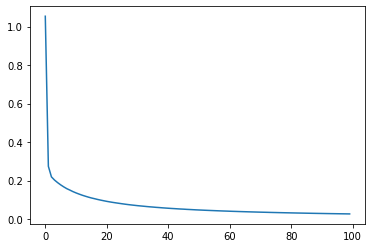

In [99]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

## c) Softmax-Engineer-Iris.ipynb

Có 2 cách để thực hiện là sử dụng label măc định dạng catgeorical thì dùng loss: sparse_categorical_crossentropy, còn nếu như label đã được convert sang one-hot-endcoding thì dung loss: categorical_crossentropy

In [105]:
# pre-processing data

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from sklearn import preprocessing

tf.keras.backend.set_floatx('float64')


batch_size = 40
epochs = 500

# Data Preparation
data = np.genfromtxt('iris_full_sm.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]
X = preprocessing.scale(X)

# create model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(units=3))
model.add(keras.layers.Activation(keras.activations.softmax))

# declare optimization method and loss function
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

# training
history = model.fit(X, y, batch_size, epochs)

# model.save('model.h5')

Train on 150 samples
Epoch 1/500
150/150 [==============================] - 1s 5ms/sample - loss: 1.3168
Epoch 2/500
150/150 [==============================] - 0s 134us/sample - loss: 1.2657
Epoch 3/500
150/150 [==============================] - 0s 147us/sample - loss: 1.2179
Epoch 4/500
150/150 [==============================] - 0s 98us/sample - loss: 1.1734
Epoch 5/500
150/150 [==============================] - 0s 166us/sample - loss: 1.1317
Epoch 6/500
150/150 [==============================] - 0s 73us/sample - loss: 1.0937
Epoch 7/500
150/150 [==============================] - 0s 158us/sample - loss: 1.0575
Epoch 8/500
150/150 [==============================] - 0s 146us/sample - loss: 1.0240
Epoch 9/500
150/150 [==============================] - 0s 124us/sample - loss: 0.9927
Epoch 10/500
150/150 [==============================] - 0s 200us/sample - loss: 0.9637
Epoch 11/500
150/150 [==============================] - 0s 150us/sample - loss: 0.9363
Epoch 12/500
150/150 [=============

150/150 [==============================] - 0s 91us/sample - loss: 0.4256
Epoch 96/500
150/150 [==============================] - 0s 119us/sample - loss: 0.4244
Epoch 97/500
150/150 [==============================] - 0s 101us/sample - loss: 0.4229
Epoch 98/500
150/150 [==============================] - 0s 111us/sample - loss: 0.4215
Epoch 99/500
150/150 [==============================] - 0s 106us/sample - loss: 0.4202
Epoch 100/500
150/150 [==============================] - 0s 95us/sample - loss: 0.4189
Epoch 101/500
150/150 [==============================] - 0s 122us/sample - loss: 0.4178
Epoch 102/500
150/150 [==============================] - 0s 140us/sample - loss: 0.4164
Epoch 103/500
150/150 [==============================] - 0s 105us/sample - loss: 0.4152
Epoch 104/500
150/150 [==============================] - 0s 86us/sample - loss: 0.4140
Epoch 105/500
150/150 [==============================] - 0s 133us/sample - loss: 0.4127
Epoch 106/500
150/150 [==============================

150/150 [==============================] - 0s 106us/sample - loss: 0.3087
Epoch 282/500
150/150 [==============================] - 0s 83us/sample - loss: 0.3084
Epoch 283/500
150/150 [==============================] - 0s 104us/sample - loss: 0.3081
Epoch 284/500
150/150 [==============================] - 0s 86us/sample - loss: 0.3077
Epoch 285/500
150/150 [==============================] - 0s 94us/sample - loss: 0.3074
Epoch 286/500
150/150 [==============================] - 0s 107us/sample - loss: 0.3071
Epoch 287/500
150/150 [==============================] - 0s 86us/sample - loss: 0.3068
Epoch 288/500
150/150 [==============================] - 0s 85us/sample - loss: 0.3064
Epoch 289/500
150/150 [==============================] - 0s 97us/sample - loss: 0.3062
Epoch 290/500
150/150 [==============================] - 0s 90us/sample - loss: 0.3058
Epoch 291/500
150/150 [==============================] - 0s 74us/sample - loss: 0.3055
Epoch 292/500
150/150 [==============================]

Epoch 375/500
150/150 [==============================] - 0s 86us/sample - loss: 0.2820
Epoch 376/500
150/150 [==============================] - 0s 68us/sample - loss: 0.2817
Epoch 377/500
150/150 [==============================] - 0s 53us/sample - loss: 0.2814
Epoch 378/500
150/150 [==============================] - 0s 119us/sample - loss: 0.2812
Epoch 379/500
150/150 [==============================] - 0s 88us/sample - loss: 0.2810
Epoch 380/500
150/150 [==============================] - 0s 93us/sample - loss: 0.2807
Epoch 381/500
150/150 [==============================] - 0s 98us/sample - loss: 0.2805
Epoch 382/500
150/150 [==============================] - 0s 111us/sample - loss: 0.2803
Epoch 383/500
150/150 [==============================] - 0s 106us/sample - loss: 0.2800
Epoch 384/500
150/150 [==============================] - 0s 102us/sample - loss: 0.2798
Epoch 385/500
150/150 [==============================] - 0s 101us/sample - loss: 0.2795
Epoch 386/500
150/150 [===============

In [104]:
# one-hot encoding

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
tf.keras.backend.set_floatx('float64')


batch_size = 40
epochs = 500

# Data Preparation
data = np.genfromtxt('iris_full_sm.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4]
y = y.astype('uint8')

classes = 3
onehots = tf.one_hot(y, classes)

# create model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(units=3))
model.add(keras.layers.Activation(keras.activations.softmax))

# declare optimization method and loss function
model.compile(optimizer='sgd', loss='categorical_crossentropy')

# training
history = model.fit(X, onehots, batch_size, epochs)

Train on 150 samples
Epoch 1/500
150/150 [==============================] - 0s 2ms/sample - loss: 2.9605
Epoch 2/500
150/150 [==============================] - 0s 73us/sample - loss: 2.7386
Epoch 3/500
150/150 [==============================] - 0s 142us/sample - loss: 2.6326
Epoch 4/500
150/150 [==============================] - 0s 129us/sample - loss: 2.5613
Epoch 5/500
150/150 [==============================] - 0s 147us/sample - loss: 2.4866
Epoch 6/500
150/150 [==============================] - 0s 113us/sample - loss: 2.4087
Epoch 7/500
150/150 [==============================] - 0s 95us/sample - loss: 2.3336
Epoch 8/500
150/150 [==============================] - 0s 102us/sample - loss: 2.2604
Epoch 9/500
150/150 [==============================] - 0s 134us/sample - loss: 2.1903
Epoch 10/500
150/150 [==============================] - 0s 84us/sample - loss: 2.1199
Epoch 11/500
150/150 [==============================] - 0s 128us/sample - loss: 2.0495
Epoch 12/500
150/150 [==============

Epoch 189/500
150/150 [==============================] - 0s 63us/sample - loss: 0.4096
Epoch 190/500
150/150 [==============================] - 0s 114us/sample - loss: 0.4081
Epoch 191/500
150/150 [==============================] - 0s 68us/sample - loss: 0.4102
Epoch 192/500
150/150 [==============================] - 0s 103us/sample - loss: 0.4065
Epoch 193/500
150/150 [==============================] - 0s 107us/sample - loss: 0.4083
Epoch 194/500
150/150 [==============================] - 0s 73us/sample - loss: 0.4061
Epoch 195/500
150/150 [==============================] - 0s 84us/sample - loss: 0.4054
Epoch 196/500
150/150 [==============================] - 0s 76us/sample - loss: 0.4033
Epoch 197/500
150/150 [==============================] - 0s 75us/sample - loss: 0.4043
Epoch 198/500
150/150 [==============================] - 0s 91us/sample - loss: 0.4017
Epoch 199/500
150/150 [==============================] - 0s 103us/sample - loss: 0.4020
Epoch 200/500
150/150 [================

150/150 [==============================] - 0s 71us/sample - loss: 0.3127
Epoch 376/500
150/150 [==============================] - 0s 72us/sample - loss: 0.3124
Epoch 377/500
150/150 [==============================] - 0s 139us/sample - loss: 0.3106
Epoch 378/500
150/150 [==============================] - 0s 163us/sample - loss: 0.3112
Epoch 379/500
150/150 [==============================] - 0s 240us/sample - loss: 0.3098
Epoch 380/500
150/150 [==============================] - ETA: 0s - loss: 0.316 - 0s 157us/sample - loss: 0.3098
Epoch 381/500
150/150 [==============================] - 0s 170us/sample - loss: 0.3094
Epoch 382/500
150/150 [==============================] - 0s 77us/sample - loss: 0.3100
Epoch 383/500
150/150 [==============================] - 0s 95us/sample - loss: 0.3091
Epoch 384/500
150/150 [==============================] - 0s 106us/sample - loss: 0.3083
Epoch 385/500
150/150 [==============================] - 0s 182us/sample - loss: 0.3080
Epoch 386/500
150/150 [===

## 5) (Optional) Thử chạy lại các ví dụ trên với giá trị khởi tạo cho theta lớn. Ví dụ như theta = tf.Variable(tf.random.normal((5, 3), dtype=tf.float64)*5)

## Lúc này, quá trình train không còn ổn định nữa

## - Tìm hiểu nguyên nhân tại sao lại có hiện tượng này
## - Đề xuất cách giải quyết.

In [103]:

import numpy as np
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('iris_full_sm.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]


# predict    
def predict(x, W, b):
    return tf.math.softmax(tf.matmul(x, W) + b)

    
### weights
W = tf.Variable(tf.random.normal((4, 3), dtype=tf.float64)*100, dtype=tf.float64)
b = tf.Variable(tf.random.normal((3,), dtype=tf.float64)*100)

### training
learning_rate = 0.1
num_epochs = 200

### loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy()

largeW_losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X, W, b)
        
        # loss
        loss_v = loss(y, output)
        largeW_losses.append(loss_v.numpy())

        # gradient
        dW, db = t.gradient(loss_v, [W, b])
        print(dW)
        # update
        W.assign_sub(learning_rate * dW) 
        b.assign_sub(learning_rate * db)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float64)
tf.Tensor(

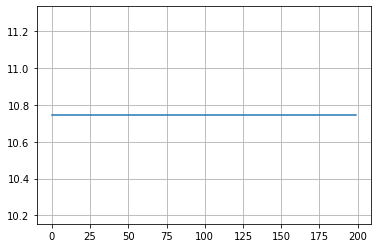

In [94]:
# plt.yscale('linear')
# plt.title('symlog')
# plt.ylim(10.74, 10.76)
plt.grid(True)
plt.plot(largeW_losses)
plt.show()

Theo như quan sát ở trên thì khi khởi tạo weight quá cao sẽ dẫn đến việc loss dường như không thay đổi (có thể không học được gì sau các lần train). Đây là vấ đề liên quan đến khởi tạo weights

Các vấn đề  thường gặp:
- Khởi tạo các weights là 1 constant, bias = 0, dẫn đến việc các units trong hidden layers học cùng những thứ giống nhau dẫn đến việc tăng số units cũng trở nên vô ít. Ví dụ 1 hidden layer có 2 units, nếu khới tại weigths = alpha và bias = 0 với input là 2 features (x1, x2) thì cả 2 unit có kết quả output như nhau alpha*x1 + alpha*x2. Và khi trong quá trình backward cả 2 unit có cùng loss, dẫn đến việc các units khác nhau không học các khía cạnh khác nhau của các features.

**=> Dẫn đến việc phải khởi tạo weight random.**

- Nhưng khi khởi tạo weight random phát sinh ra 2 vấn đề, weights quá lớn hoặc weights quá nhỏ sẽ dẫn đến việc model không thể hội tụ hoặc học rất chậm. 2 vấn đề này được gọi là exploding và vanishing gradients.

  + Exploding: Giả xử khi khởi tạo weight rất lớn, và model có rất nhiều layers, thì khi thực hiện forward dẫn đến output của từng layer có giá trị tăng theo cấp số mũ nếu như biến khai báo không đủ sẽ dẫn đến overflow, thứ 2 trong quá trình backward loss quá lớn dẫn đến việc gradient sẽ đi 1 khoảng lớn và giao động liên tục điểm cực tiểu và không thể hội tụ được.
  
  + Vanishing: Ngược lại khi weight quá nhỏ dẫn đến việc giá trị output giảm theo cấp số  mũ và khi backward giá trị update gần như bằng không dẫn đến việc model gần như không học thêm nữa hoặc học rất chậm.
  
**=> Để giải quyết được vấn đề thì có 2 yếu caauf: mean của các activations phải là 0, và variance của các activations phải gần như không đổi hoặc thay đổi rất ít khi qua các layers trong model**

[Xavier initialization](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf?hc_location=ufi]) được khuyên dùng và đây cũng là default initialize weight trong Dense của tensorflow.


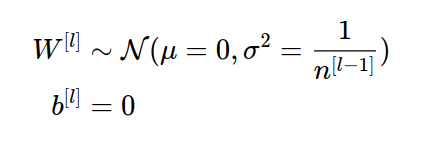

Theo công thức trên, layer thứ l ký hiệu là l, bias của layer l khởi tạo = 0, weights được chọn random từ normal distribution, với mean = 0, variance = nghịch đảo số lượng neurons (units) của layer trước 


**Vấn đề ở trên weights lớn nhưng loss không thay đổi do weight khởi tạo lớn dẫn đến output qua sigmoid sẽ gần như bằng 1, và gradient dường như không đổi vì khi vẽ ra slope của hàm sigmoid tiệm cận 1 gần như là 1 đường thẳng nên loss không đổi**

**Vấn đề em không hiểu là tại sao gradient của weight lại bằng 0**

**Khi dùng Xavier initialization vấn đề được giải quyết**

In [29]:

import numpy as np
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

### Data preparation
data = np.genfromtxt('iris_full_sm.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]


# predict    
def predict(x, W, b):
    return tf.math.softmax(tf.matmul(x, W) + b)

    
### Xavier initial weights
W = tf.Variable(tf.random.normal((4, 3), mean=0, stddev= 1/X.shape[1] , dtype=tf.float64), dtype=tf.float64)
b = tf.Variable(0, dtype=tf.float64)

### training
learning_rate = 0.1
num_epochs = 200

### loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy()

xavier_init_losses = [] # for debug
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = predict(X, W, b)
        
        # loss
        loss_v = loss(y, output)
        xavier_init_losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [W, b])
        
        # update
        W.assign_sub(learning_rate * dW) 
        b.assign_sub(learning_rate * db)

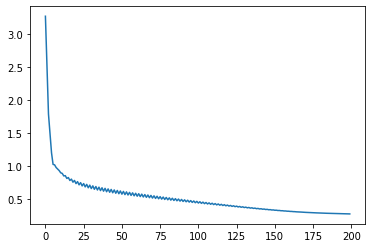

In [30]:
plt.plot(xavier_init_losses)
plt.show()

## References

https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78

https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79

https://www.deeplearning.ai/ai-notes/initialization/index.html

http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf?hc_location=ufi]